In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
cleaned_data = pd.read_csv("../src/cleaned_data.csv")
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36560 entries, 0 to 36559
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         36560 non-null  int64  
 1   City                       36560 non-null  object 
 2   PostalCode                 36560 non-null  int64  
 3   Region                     36560 non-null  object 
 4   District                   36560 non-null  object 
 5   Province                   36560 non-null  object 
 6   PropertyType               36560 non-null  object 
 7   PropertySubType            36560 non-null  object 
 8   Price                      36560 non-null  int64  
 9   BidStylePricing            36560 non-null  int64  
 10  ConstructionYear           25768 non-null  float64
 11  BedroomCount               36560 non-null  int64  
 12  LivingArea                 36560 non-null  int64  
 13  KitchenType                22653 non-null  obj

In [13]:
model_data = pd.read_csv("../src/model_data.csv")
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32802 entries, 0 to 32801
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         32802 non-null  int64  
 1   City                       32802 non-null  object 
 2   PostalCode                 32802 non-null  int64  
 3   Region                     32802 non-null  object 
 4   District                   32802 non-null  object 
 5   Province                   32802 non-null  object 
 6   PropertyType               32802 non-null  object 
 7   PropertySubType            32802 non-null  object 
 8   Price                      32802 non-null  int64  
 9   ConstructionYear           22873 non-null  float64
 10  BedroomCount               32802 non-null  int64  
 11  LivingArea                 32802 non-null  int64  
 12  KitchenType                20609 non-null  object 
 13  Furnished                  32802 non-null  int

C:\Users\bearr\AppData\Local\Temp\ipykernel_14428\2437540384.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  model_data = pd.read_csv("../src/model_data.csv")


In [14]:
clean_house_data = cleaned_data[cleaned_data['PropertyType'] == 'House']
clean_apartment_data = cleaned_data[cleaned_data['PropertyType'] == 'Apartment']
model_house_data = model_data[model_data['PropertyType'] == 'House']
model_apartment_data = model_data[model_data['PropertyType'] == 'Apartment']



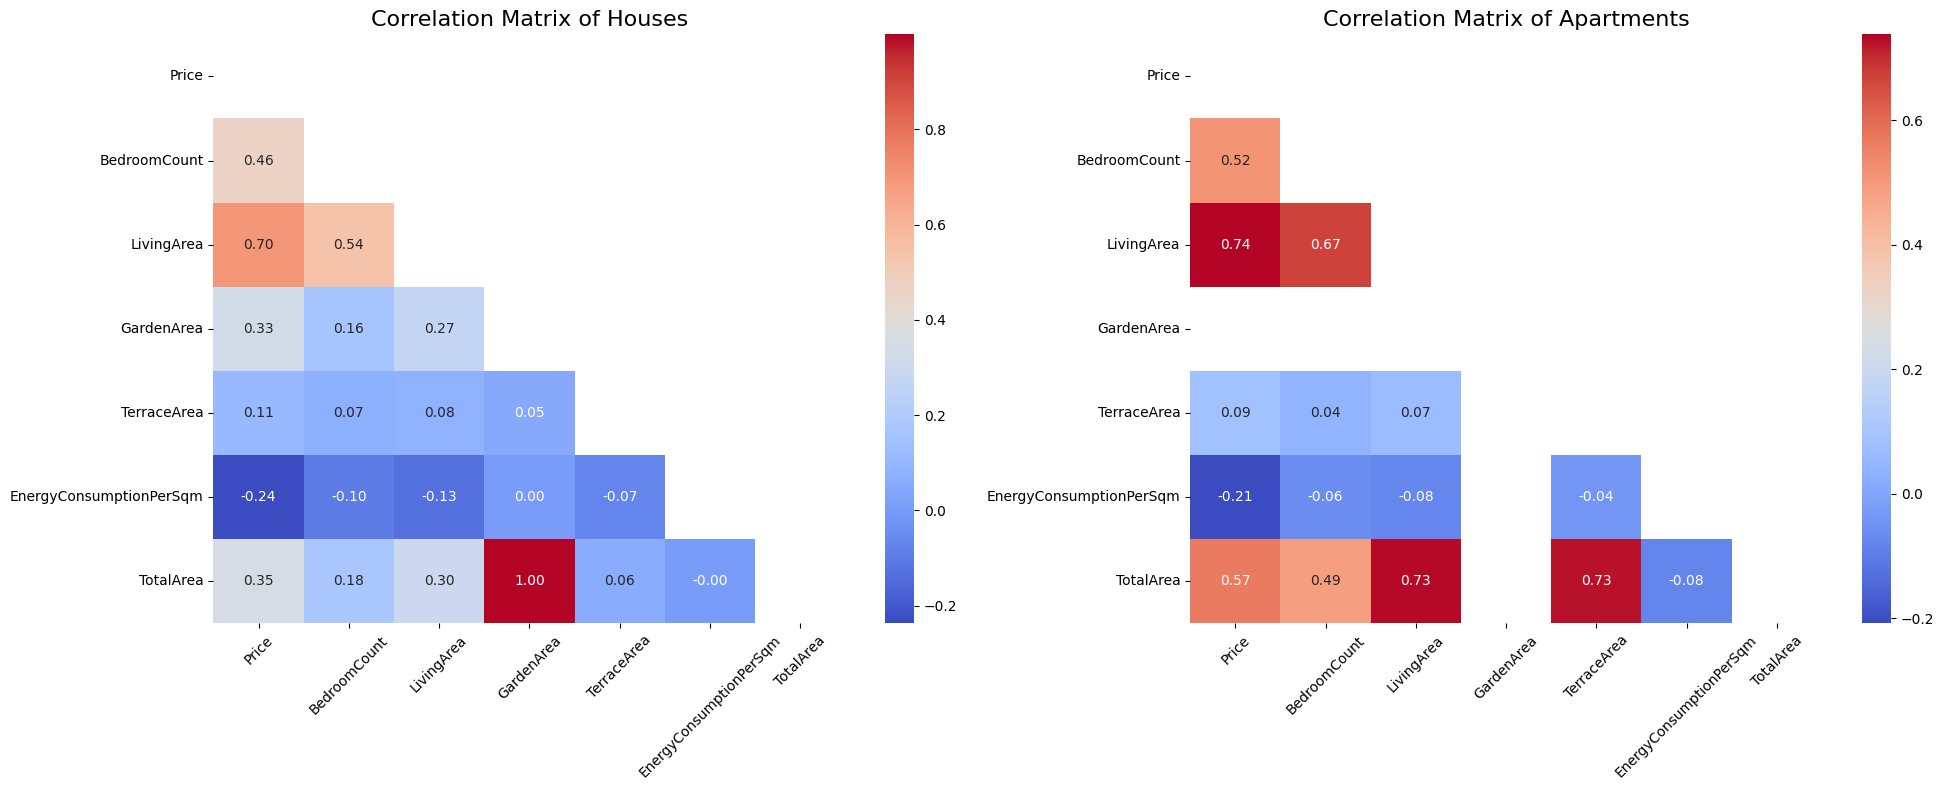

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns you want to include in the correlation matrix
columns_to_include = ['Price', 'BedroomCount', 'LivingArea', 'GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm', 'TotalArea']

# Filter the dataframe to include only the specified columns and PropertyType == House
numeric_columns_house = model_data[model_data['PropertyType'] == 'House'][columns_to_include]

# Filter the dataframe to include only the specified columns and PropertyType == Apartment
numeric_columns_apartment = model_data[model_data['PropertyType'] == 'Apartment'][columns_to_include]

# Compute the correlation matrix for House
correlation_matrix_house = numeric_columns_house.corr()

# Compute the correlation matrix for Apartment
correlation_matrix_apartment = numeric_columns_apartment.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_house, dtype=bool))

# Create subplots for House and Apartment
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot correlation matrix for House
sns.heatmap(correlation_matrix_house, mask=mask, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
axes[0].set_title('Correlation Matrix of Houses', fontsize=16)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Plot correlation matrix for Apartment
sns.heatmap(correlation_matrix_apartment, mask=mask, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
axes[1].set_title('Correlation Matrix of Apartments', fontsize=16)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

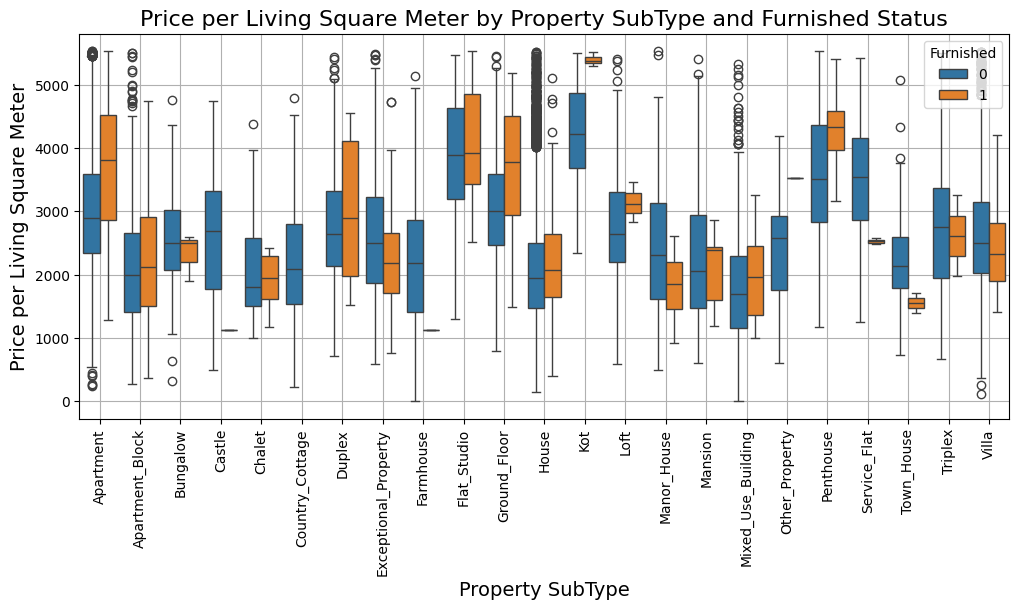

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort PropertySubType alphabetically
model_data_sorted = model_data.sort_values(by='PropertySubType')

# Create a box plot with hue based on Furnished column
plt.figure(figsize=(12, 5))
sns.boxplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter', hue='Furnished')
plt.title('Price per Living Square Meter by Property SubType and Furnished Status', fontsize=16)
plt.xlabel('Property SubType', fontsize=14)
plt.ylabel('Price per Living Square Meter', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='Furnished', loc='upper right')
plt.grid(True)
plt.show()

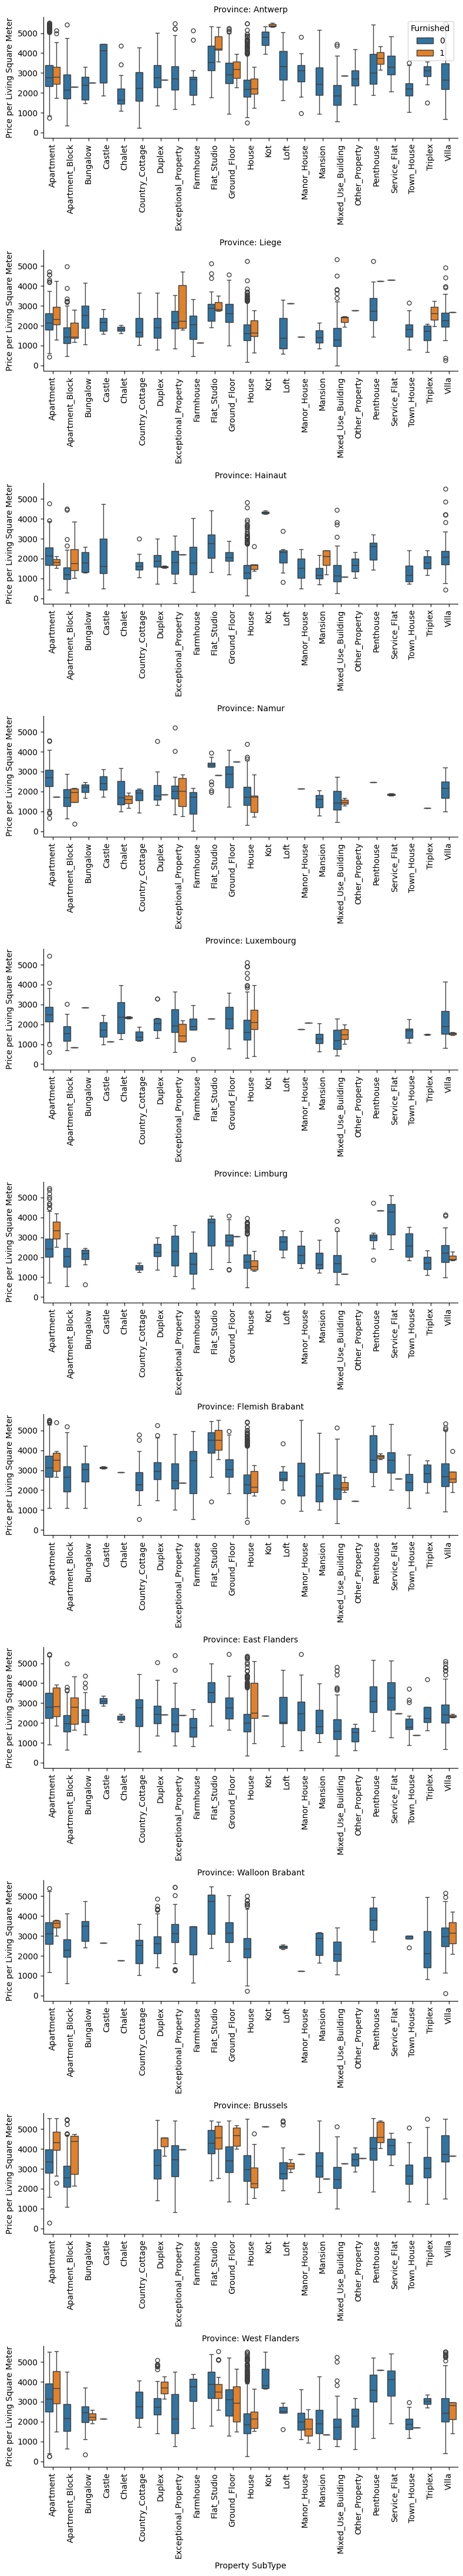

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort PropertySubType alphabetically
model_data_sorted = model_data.sort_values(by='PropertySubType')

# Get the sorted order of PropertySubType
sorted_subtype_order = model_data_sorted['PropertySubType'].unique()

# Create a box plot with hue based on Furnished column
g = sns.catplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter', hue='Furnished',
                col='Province', col_wrap=1, kind='box', height=4, aspect=2,
                legend_out=False, sharex=False, order=sorted_subtype_order)

g.set_titles("Province: {col_name}")
g.set_axis_labels('Property SubType', 'Price per Living Square Meter')
g.set_xticklabels(rotation=90)  # Rotate x-axis labels vertically
g.add_legend(title='Furnished', loc='upper right')
plt.tight_layout()
plt.show()

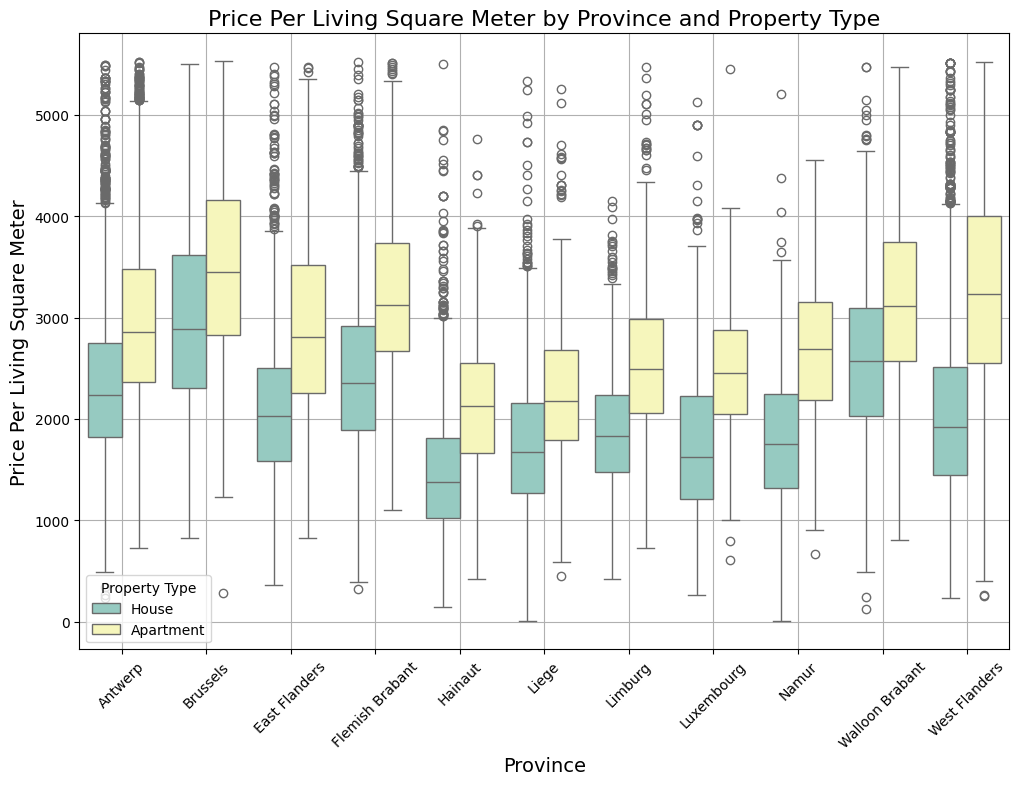

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique provinces and sort alphabetically
provinces = sorted(model_data['Province'].unique())

# Create a box plot with provinces sorted alphabetically
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province', y='PricePerLivingSquareMeter', hue='PropertyType', data=model_data, palette='Set3', order=provinces)
plt.title('Price Per Living Square Meter by Province and Property Type', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Price Per Living Square Meter', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

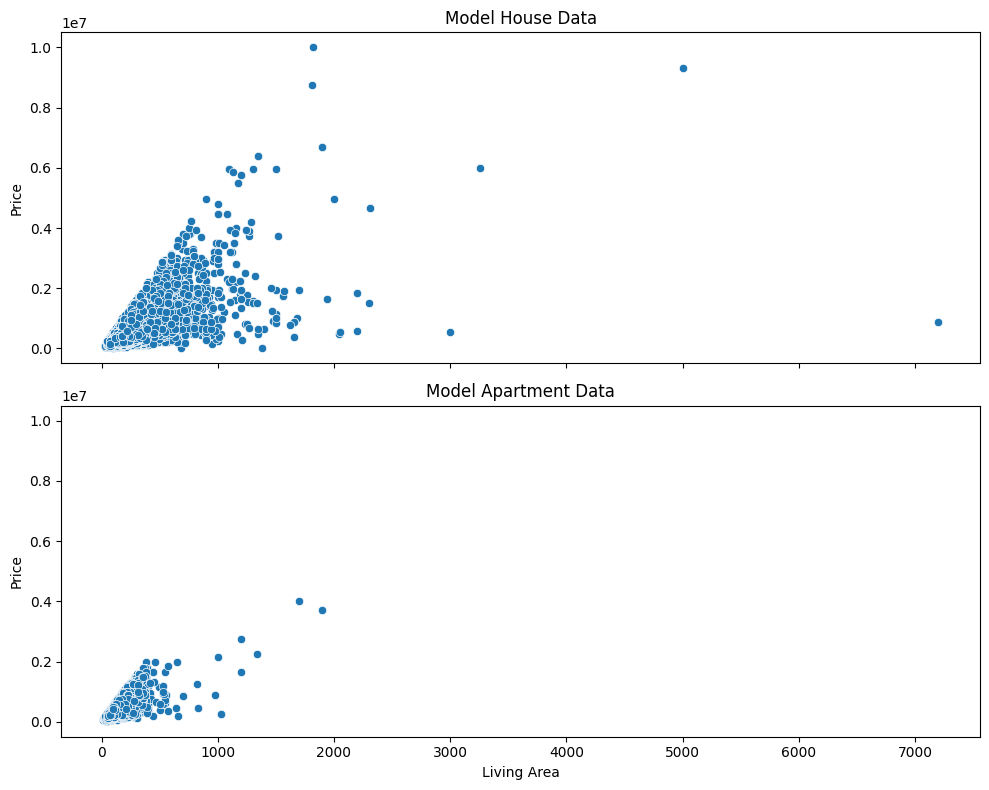

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot scatterplot for model_house_data
sns.scatterplot(data=model_house_data, x='LivingArea', y='Price', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Model House Data')
axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')

# Plot scatterplot for model_apartment_data
sns.scatterplot(data=model_apartment_data, x='LivingArea', y='Price', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('Model Apartment Data')
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Price')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='EnergyConsumptionPerSqm', ylabel='PricePerLivingSquareMeter'>

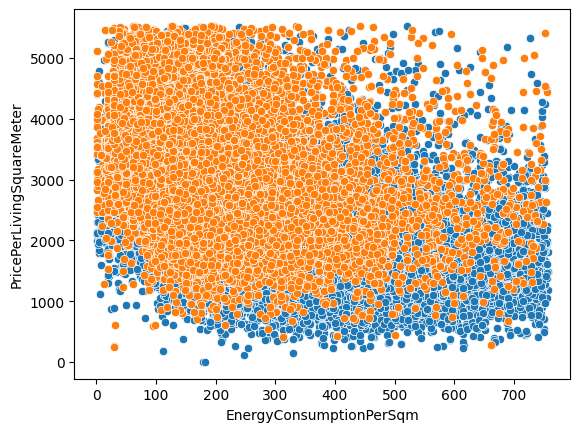

In [21]:
sns.scatterplot(data=model_house_data, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')
sns.scatterplot(data=model_apartment_data, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')

C:\Users\bearr\AppData\Local\Temp\ipykernel_14428\1944470016.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=clean_house_data['PricePerTotalSquareMeter'], kde=True, color='blue', palette=['blue'])
C:\Users\bearr\AppData\Local\Temp\ipykernel_14428\1944470016.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=clean_apartment_data['PricePerTotalSquareMeter'], kde=True, color='orange', palette=['orange'])


<Axes: xlabel='PricePerTotalSquareMeter', ylabel='Count'>

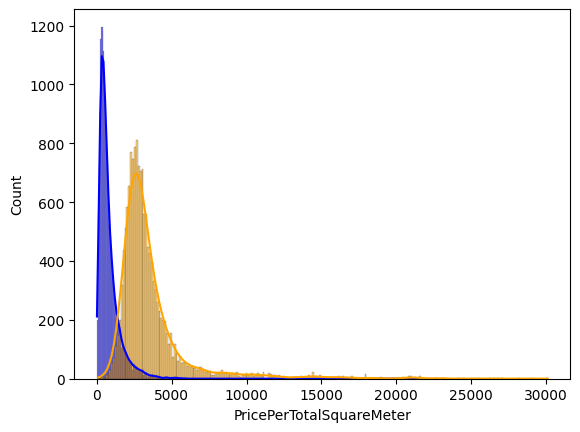

In [6]:
sns.histplot(data=clean_house_data['PricePerTotalSquareMeter'], kde=True, color='blue', palette=['blue'])
sns.histplot(data=clean_apartment_data['PricePerTotalSquareMeter'], kde=True, color='orange', palette=['orange'])

C:\Users\bearr\AppData\Local\Temp\ipykernel_14428\3843696961.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_house_data['PricePerTotalSquareMeter'], kde=True, color='blue', palette=['blue'])
C:\Users\bearr\AppData\Local\Temp\ipykernel_14428\3843696961.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_apartment_data['PricePerTotalSquareMeter'], kde=True, color='orange', palette=['orange'])


<Axes: xlabel='PricePerTotalSquareMeter', ylabel='Count'>

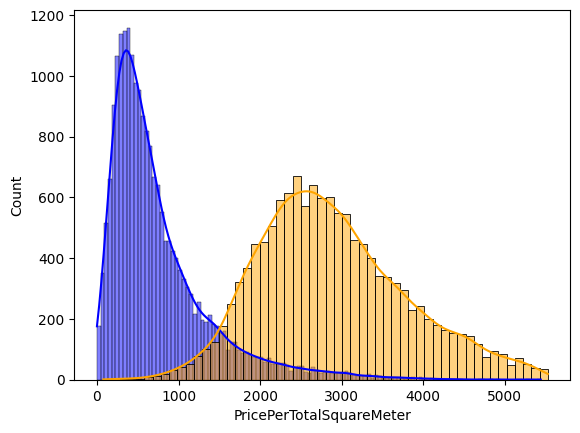

In [7]:
import seaborn as sns

# Plot histograms with filtered data
sns.histplot(data=model_house_data['PricePerTotalSquareMeter'], kde=True, color='blue', palette=['blue'])
sns.histplot(data=model_apartment_data['PricePerTotalSquareMeter'], kde=True, color='orange', palette=['orange'])

C:\Users\bearr\AppData\Local\Temp\ipykernel_14428\1387835146.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_house_data['PricePerLivingSquareMeter'], kde=True, color='blue', palette=['blue'])
C:\Users\bearr\AppData\Local\Temp\ipykernel_14428\1387835146.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_apartment_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])


<Axes: xlabel='PricePerLivingSquareMeter', ylabel='Count'>

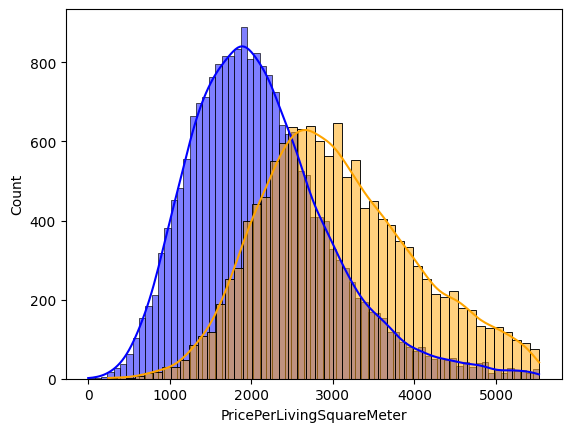

In [8]:
sns.histplot(data=model_house_data['PricePerLivingSquareMeter'], kde=True, color='blue', palette=['blue'])
sns.histplot(data=model_apartment_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])

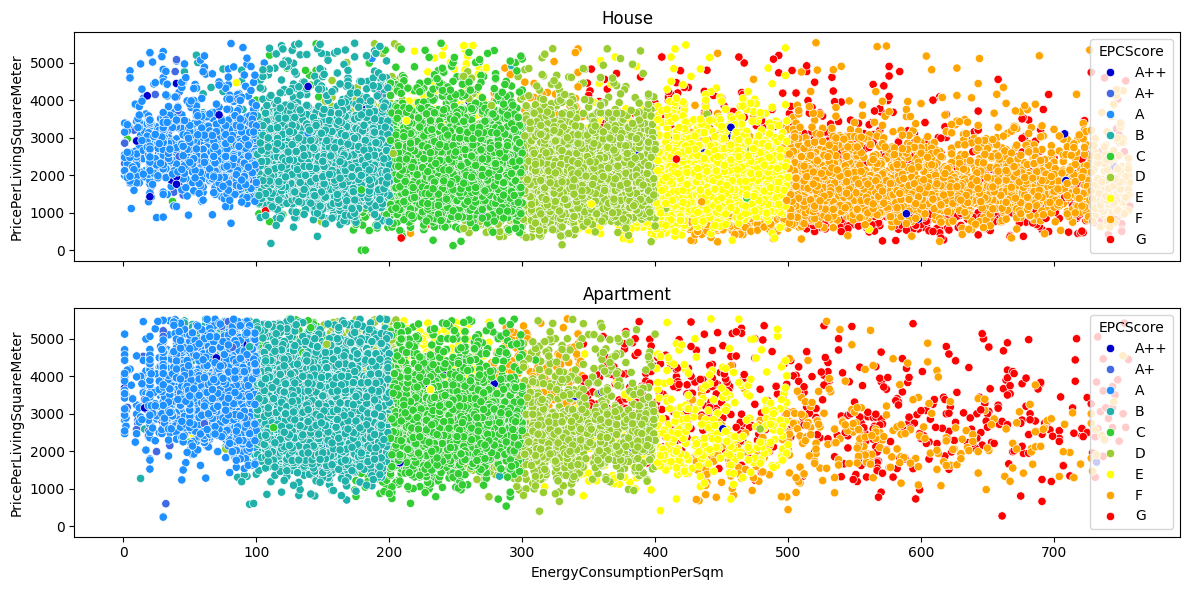

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = {
    'G': 'red',     # G: red
    'F': 'orange',  # F: orange
    'E': 'yellow',  # E: yellow
    'D': 'yellowgreen',  # D: yellow-green
    'C': 'limegreen',    # C: green
    'B': 'lightseagreen',  # B: light blue-green
    'A': 'dodgerblue',  # A: blue
    'A+': 'royalblue',  # A+: dark blue
    'A++': 'mediumblue', # A++: medium blue
}

# Define custom order for EPCScore legend
epc_score_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)

# Scatter plot for PropertyType == House
sns.scatterplot(x="EnergyConsumptionPerSqm", y="PricePerLivingSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=model_house_data, ax=axs[0])
axs[0].set_title('House')

# Scatter plot for PropertyType == Apartment
sns.scatterplot(x="EnergyConsumptionPerSqm", y="PricePerLivingSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=model_apartment_data, ax=axs[1])
axs[1].set_title('Apartment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
